# Jupyter notebook to explore AMR++ results


### This notebook explores results from the Noyes's laboratory research in collaboration with the National Pork Board

### This jupyter notebook relies on the "staging_script.R" script that has to be manually filled out.



In [20]:
# Source the staging_script.R
# This will load all the necessary R libraries, load the AMR++ results, output exploratory figures on a-priori
# variables, and create R objects you can use for further analysis
source('staging_script.R')
# I just added this next script to create phyloseq objects, so please excuse any errors
source('scripts/load_phyloseq_data.R')

[1] "No microbiome features removed"


Default value being used.


[1] "No AMR features removed"


Default value being used.


## Exploratory figures

You can find exploratory figures in the "graphs" directory

To further analyze your data and create custom figures, use these R objects containing counts in the "melted" format
* Sample metadata
  * metadata
  * microbiome_metadata
* Resistome count data ("RequiresSNPConfirmation" counts removed)
  * amr_melted_analytic
  * amr_melted_raw_analytic
* Microbiome count data
  * microbiome_melted_analytic
  * microbiome_melted_analytic
  
You can also use the following list objects which contain metagenomeSeq data:
* Resistome metagenomeSeq objects
  * AMR_analytic_data
* Microbiome metagenomeSeq objects
  * microbiome_analytic_data
  
Finally, here are two phyloseq objects that we are still experimenting with:
* amr.ps
* kraken_microbiome.ps

In [16]:
print("kraken phyloseq object")
kraken_microbiome.ps

print("AMR phyloseq object")
amr.ps

[1] "kraken phyloseq object"


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11882 taxa and 216 samples ]
sample_data() Sample Data:       [ 216 samples by 38 sample variables ]
tax_table()   Taxonomy Table:    [ 11882 taxa by 8 taxonomic ranks ]

[1] "AMR phyloseq object"


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1067 taxa and 216 samples ]
sample_data() Sample Data:       [ 216 samples by 38 sample variables ]
tax_table()   Taxonomy Table:    [ 1067 taxa by 3 taxonomic ranks ]

In [18]:
### Start of code for figures, combine table objects to include meta
setkey(amr_melted_raw_analytic,ID) 
setkey(amr_melted_analytic,ID) 

setkey(microbiome_melted_analytic,ID)
# Set keys for both metadata files
setkey(metadata,ID)
setkey(microbiome_metadata,ID)
microbiome_melted_analytic <- microbiome_melted_analytic[microbiome_metadata]
amr_melted_raw_analytic <- amr_melted_raw_analytic[metadata]
amr_melted_analytic <- amr_melted_analytic[metadata]

In [5]:
head(amr_melted_analytic)

Level_ID,Name,ID,Normalized_Count,Sample,UMGC_SampleID,Serial_Number,CollectionDate,SampleType,ExtractionDate,⋯,Yield..Mbases.,X..PF.Cluster,X.....Q30.bases,Mean.Quality.Score,resistome_raw_mapped_reads,resistome_CSS_counts,AMR_class_Richness,AMR_class_Shannon,AMR_mech_Richness,AMR_mech_Shannon
Class,Aminoglycosides,NPB_F10_10_F7_S24,375.200724,NPB_F10_10_F7_S24,NPB_F10_10_F7,118,12-19-2018,Feces,10.16.2019,⋯,18771,100,92.77,35.71,141455,4129.952,6,0.8448969,16,1.35204
Class,Multi-biocide resistance,NPB_F10_10_F7_S24,0.000000,NPB_F10_10_F7_S24,NPB_F10_10_F7,118,12-19-2018,Feces,10.16.2019,⋯,18771,100,92.77,35.71,141455,4129.952,6,0.8448969,16,1.35204
Class,Multi-metal resistance,NPB_F10_10_F7_S24,0.000000,NPB_F10_10_F7_S24,NPB_F10_10_F7,118,12-19-2018,Feces,10.16.2019,⋯,18771,100,92.77,35.71,141455,4129.952,6,0.8448969,16,1.35204
Class,Arsenic resistance,NPB_F10_10_F7_S24,0.000000,NPB_F10_10_F7_S24,NPB_F10_10_F7,118,12-19-2018,Feces,10.16.2019,⋯,18771,100,92.77,35.71,141455,4129.952,6,0.8448969,16,1.35204
Class,Multi-drug resistance,NPB_F10_10_F7_S24,5.897638,NPB_F10_10_F7_S24,NPB_F10_10_F7,118,12-19-2018,Feces,10.16.2019,⋯,18771,100,92.77,35.71,141455,4129.952,6,0.8448969,16,1.35204
Class,Acid resistance,NPB_F10_10_F7_S24,0.000000,NPB_F10_10_F7_S24,NPB_F10_10_F7,118,12-19-2018,Feces,10.16.2019,⋯,18771,100,92.77,35.71,141455,4129.952,6,0.8448969,16,1.35204


# Example of how to make figures using phyloseq

In [21]:
phylum_kraken.ps <- tax_glom(kraken_microbiome.ps, "phylum")

phylum_kraken.ps.rel <- transform_sample_counts(phylum_kraken.ps, function(x) x / sum(x) )

phylum_kraken.ps.rel.melt <- psmelt(phylum_kraken.ps.rel)

phylum_kraken.ps.rel.melt <- phylum_kraken.ps.rel.melt %>%
  group_by(phylum) %>%
  mutate(mean_phylum_rel_abundance = mean(Abundance))

phylum_kraken.ps.rel.melt$phylum <- as.character(phylum_kraken.ps.rel.melt$phylum)
phylum_kraken.ps.rel.melt$mean_phylum_rel_abundance <- as.numeric(phylum_kraken.ps.rel.melt$mean_phylum_rel_abundance)

phylum_kraken.ps.rel.melt$phylum[phylum_kraken.ps.rel.melt$mean_phylum_rel_abundance < 0.005] <- "Low abundance phyla (< 0.5%)"


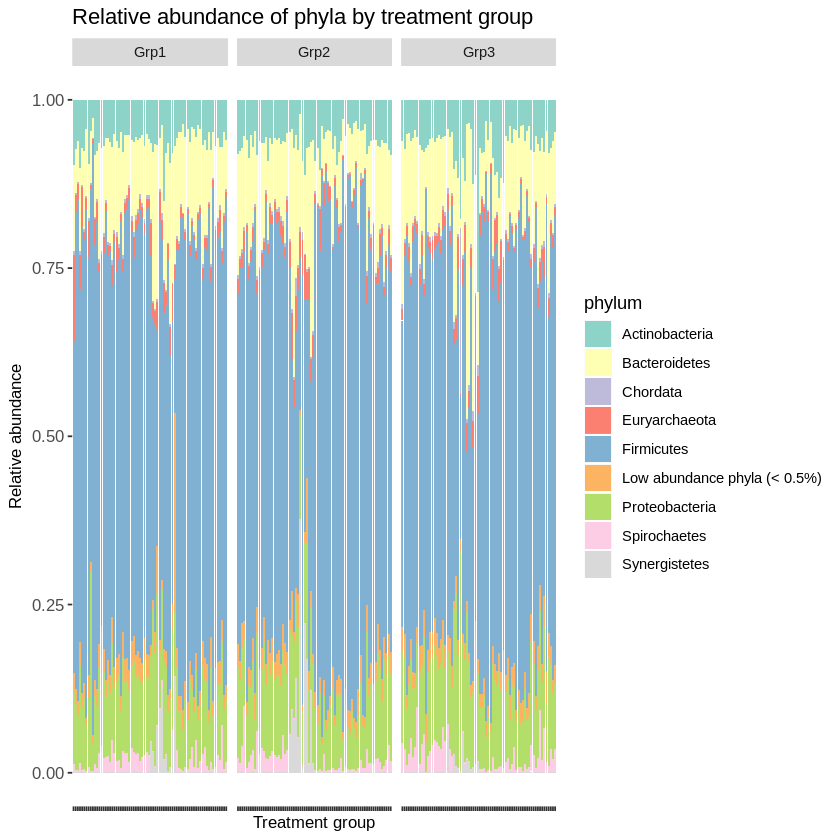

In [29]:
##### Plot phyla relative abundances
ggplot(phylum_kraken.ps.rel.melt, aes(x = Sample, y = Abundance, fill = phylum)) +
  geom_bar(stat = "identity") +
  facet_wrap(~TreatmentGroup, scales = "free_x") +
  labs(x = "Treatment group", y = "Relative abundance", col = "Phylum", title = "Relative abundance of phyla by treatment group") + 
  theme(axis.text.x = element_blank(),
        axis.title.x = element_text(size = 10),
        axis.text.y = element_text(size = 10),
        axis.title.y = element_text(size = 10),
        panel.background = element_rect(fill = "white")) +
  scale_fill_brewer(palette="Set3")